<a href="https://colab.research.google.com/github/GuyInFreezer/project-1/blob/Jay/JayColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
from ast import increment_lineno
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
# load the csv file that contains the mean sea level data.
uploaded=files.upload()

Saving city_1.csv to city_1 (1).csv


In [ ]:
# This data is actually a Fortran IV datafile that is separated by semicolons
df = pd.read_csv("city_1.csv", sep=';', names=['date', 'height', 'ig1', 'ig2'])

# Drop the columns you don't need and make the mean sea level (variable = height) is cast as an integer
df = df[['date', 'height']]
df['height'] = df['height'].astype(int)
print(df)
df.dtypes



             date  height
0       1930.0417    6774
1       1930.1250    6777
2       1930.2083    6702
3       1930.2917    6750
4       1930.3750    6726
...           ...     ...
1111    2022.6250    7257
1112    2022.7083    7229
1113    2022.7917    7224
1114    2022.8750    7232
1115    2022.9583    7138

[1116 rows x 2 columns]


date      object
height     int64
dtype: object

In [ ]:
# This datafile uses -9999 for blank data. We need to remove those results and reset the index
df = df[df['height'] >= 5000]
df = df.reset_index(drop=True)
# print(df.iloc[195:210])
print(df)
df.dtypes


             date  height
0       1930.0417    6774
1       1930.1250    6777
2       1930.2083    6702
3       1930.2917    6750
4       1930.3750    6726
...           ...     ...
1086    2022.6250    7257
1087    2022.7083    7229
1088    2022.7917    7224
1089    2022.8750    7232
1090    2022.9583    7138

[1091 rows x 2 columns]


date      object
height     int64
dtype: object

In [ ]:
# The date colum is an object. This code shows the "invisible" alphanumerics - "\xa0"
# df.iloc[1015,0] for Wilmington
df.iloc[150,0]  # for Miami and Wilmington



'\xa0 1942.5417'

In [ ]:
# A recheck at a different location to see if the invisible alphanumerics are the same or different
df.iloc[1,0]

'\xa0 1930.1250'

In [ ]:
# Remove "\xa0" from 'date' column
df['date'] = df['date'].str.replace('\xa0 ', '')

# Convert 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%Y.%f')

# Now you have a 'date' column with datetime values including the decimal part
print(df)
print("-----------------------------------------------------")
df.dtypes


           date  height
0     1930.0417    6774
1     1930.1250    6777
2     1930.2083    6702
3     1930.2917    6750
4     1930.3750    6726
...         ...     ...
1086  2022.6250    7257
1087  2022.7083    7229
1088  2022.7917    7224
1089  2022.8750    7232
1090  2022.9583    7138

[1091 rows x 2 columns]
-----------------------------------------------------


date      object
height     int64
dtype: object

In [ ]:
# Check to see if the invisible alphanumerics are gone.
# df.iloc[1010,0] for Wilmington
df.iloc[250, 0] # for Miami


'1952.4583'

In [ ]:
# Change df['date'] column to float so that we can separate year from month
df['date'] = df['date'].str.strip()  # Remove leading and trailing whitespaces
df['date'] = df['date'].astype(float)  # Convert 'date' column to float
df['year'] = df['date'].astype(int)  # Extract 'year' and 'month' columns
df['month'] = (df['date'] - df['year']) * 12

# Now you have 'year' and 'month' columns, but the month variables will
# be corrected in the next cell
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1930.0417  1930   0.5004    6774
1     1930.1250  1930   1.5000    6777
2     1930.2083  1930   2.4996    6702
3     1930.2917  1930   3.5004    6750
4     1930.3750  1930   4.5000    6726
...         ...   ...      ...     ...
1086  2022.6250  2022   7.5000    7257
1087  2022.7083  2022   8.4996    7229
1088  2022.7917  2022   9.5004    7224
1089  2022.8750  2022  10.5000    7232
1090  2022.9583  2022  11.4996    7138

[1091 rows x 4 columns]


In [ ]:
# The month variables need to be moved from mid-month to full month.
df['month'] = df['month'] + 0.5

# Now you have 'year' and 'month' columns
# Month is a float variable still
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1930.0417  1930   1.0004    6774
1     1930.1250  1930   2.0000    6777
2     1930.2083  1930   2.9996    6702
3     1930.2917  1930   4.0004    6750
4     1930.3750  1930   5.0000    6726
...         ...   ...      ...     ...
1086  2022.6250  2022   8.0000    7257
1087  2022.7083  2022   8.9996    7229
1088  2022.7917  2022  10.0004    7224
1089  2022.8750  2022  11.0000    7232
1090  2022.9583  2022  11.9996    7138

[1091 rows x 4 columns]


In [ ]:
# Change month to an integer
df['int_month'] = round(df['month']).astype(int)
print(df[['date', 'year', 'int_month' , 'height']])



           date  year  int_month  height
0     1930.0417  1930          1    6774
1     1930.1250  1930          2    6777
2     1930.2083  1930          3    6702
3     1930.2917  1930          4    6750
4     1930.3750  1930          5    6726
...         ...   ...        ...     ...
1086  2022.6250  2022          8    7257
1087  2022.7083  2022          9    7229
1088  2022.7917  2022         10    7224
1089  2022.8750  2022         11    7232
1090  2022.9583  2022         12    7138

[1091 rows x 4 columns]


In [ ]:
# Combine the year and month columns into a datetime column
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['int_month'].astype(str), format='%Y-%m')

# Print the result
print(df[['date', 'year', 'int_month', 'height', 'year_month']])


           date  year  int_month  height year_month
0     1930.0417  1930          1    6774 1930-01-01
1     1930.1250  1930          2    6777 1930-02-01
2     1930.2083  1930          3    6702 1930-03-01
3     1930.2917  1930          4    6750 1930-04-01
4     1930.3750  1930          5    6726 1930-05-01
...         ...   ...        ...     ...        ...
1086  2022.6250  2022          8    7257 2022-08-01
1087  2022.7083  2022          9    7229 2022-09-01
1088  2022.7917  2022         10    7224 2022-10-01
1089  2022.8750  2022         11    7232 2022-11-01
1090  2022.9583  2022         12    7138 2022-12-01

[1091 rows x 5 columns]


In [ ]:
# Check the data types
df.dtypes

date                 float64
height                 int64
year                   int64
month                float64
int_month              int64
year_month    datetime64[ns]
dtype: object

In [ ]:
# Create a new datafile that just has the datetime variable (year_month) and the depending (y) variable (height)
new_df = df[['year_month', 'height']].copy()

# Print the result
print(new_df)

     year_month  height
0    1930-01-01    6774
1    1930-02-01    6777
2    1930-03-01    6702
3    1930-04-01    6750
4    1930-05-01    6726
...         ...     ...
1086 2022-08-01    7257
1087 2022-09-01    7229
1088 2022-10-01    7224
1089 2022-11-01    7232
1090 2022-12-01    7138

[1091 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Same the cleaned data to a GoogleDrive
# new_df.to_csv('/content/drive/MyDrive/my_cleaned_sea_level_data.csv', index=False) - for Wilmington
new_df.to_csv('/content/drive/MyDrive/my_cleaned_sea_level_data_Miami.csv', index=False) # for Miami

In [ ]:
# Remane the datetime and y-variable so that they can be used by Prophet
new_df.columns = ['ds' , 'y']
display(new_df)


,ds,y
0,1930-01-01,6774
1,1930-02-01,6777
2,1930-03-01,6702
3,1930-04-01,6750
4,1930-05-01,6726
...,...,...
1086,2022-08-01,7257
1087,2022-09-01,7229
1088,2022-10-01,7224
1089,2022-11-01,7232


In [ ]:
# import M
from re import M
m = Prophet()


In [ ]:
m.fit(new_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm70e66j/oxwluyws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm70e66j/rjxh8ayd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80589', 'data', 'file=/tmp/tmpjm70e66j/oxwluyws.json', 'init=/tmp/tmpjm70e66j/rjxh8ayd.json', 'output', 'file=/tmp/tmpjm70e66j/prophet_model_196mpbf/prophet_model-20240207222108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Use Prophet to make an estimate of the next 10 years worth of sea level height
future = m.make_future_dataframe(periods=120, freq='M')
display(future.tail(10))


,ds
1201,2032-02-29
1202,2032-03-31
1203,2032-04-30
1204,2032-05-31
1205,2032-06-30
1206,2032-07-31
1207,2032-08-31
1208,2032-09-30
1209,2032-10-31
1210,2032-11-30


In [ ]:
# Use Prophet to forecast the height of sea level
forecast = m.predict(future)
display(forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1206,2032-07-31,7212.973942,7191.649866,7352.069034,7161.999346,7259.920733,61.480479,61.480479,61.480479,61.480479,61.480479,61.480479,0.0,0.0,0.0,7274.454420
1207,2032-08-31,7213.206660,7224.802365,7384.838269,7161.681141,7260.650089,92.793171,92.793171,92.793171,92.793171,92.793171,92.793171,0.0,0.0,0.0,7305.999831
1208,2032-09-30,7213.431871,7202.299361,7362.040082,7161.341455,7261.720596,72.229770,72.229770,72.229770,72.229770,72.229770,72.229770,0.0,0.0,0.0,7285.661641
1209,2032-10-31,7213.664589,7159.440931,7314.452261,7160.706454,7262.798611,20.895298,20.895298,20.895298,20.895298,20.895298,20.895298,0.0,0.0,0.0,7234.559887
1210,2032-11-30,7213.889800,7118.903505,7271.824425,7160.687221,7263.869119,-13.336656,-13.336656,-13.336656,-13.336656,-13.336656,-13.336656,0.0,0.0,0.0,7200.553144


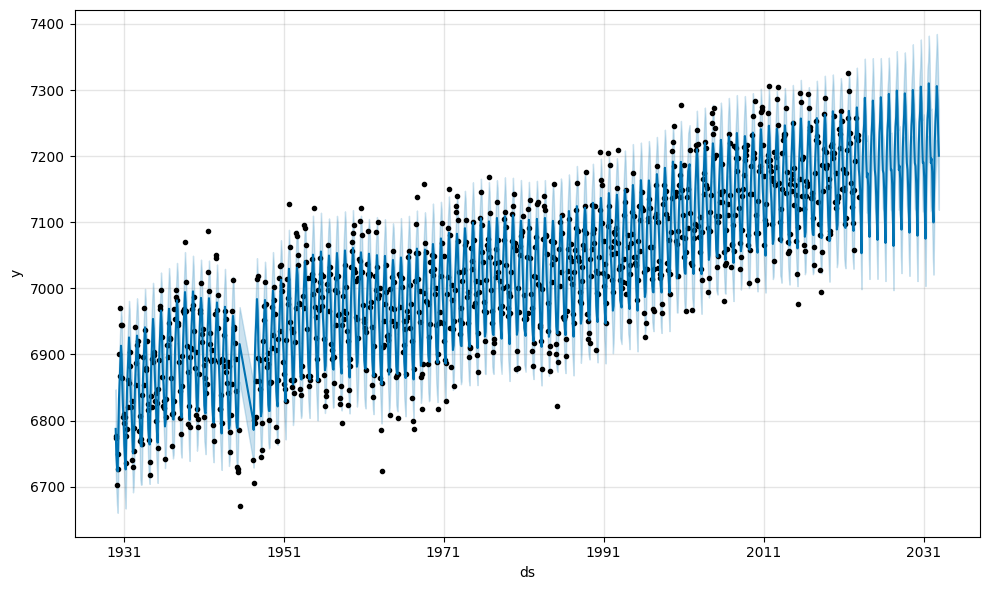

In [ ]:
m.plot(forecast);


In [ ]:
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1206,2032-07-31,7274.454420,7191.649866,7352.069034
1207,2032-08-31,7305.999831,7224.802365,7384.838269
1208,2032-09-30,7285.661641,7202.299361,7362.040082
1209,2032-10-31,7234.559887,7159.440931,7314.452261
1210,2032-11-30,7200.553144,7118.903505,7271.824425


In [ ]:
forecast = forecast.set_index('ds')
forecast.tail(10)


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2032-02-29,7211.825366,7045.884746,7194.806569,7163.729360,7257.133608,-88.062403,-88.062403,-88.062403,-88.062403,-88.062403,-88.062403,0.0,0.0,0.0,7123.762963
2032-03-31,7212.058084,7020.737622,7176.282592,7163.209912,7258.211746,-112.328630,-112.328630,-112.328630,-112.328630,-112.328630,-112.328630,0.0,0.0,0.0,7099.729453
2032-04-30,7212.283295,7090.975744,7244.564401,7162.953578,7258.622735,-46.007341,-46.007341,-46.007341,-46.007341,-46.007341,-46.007341,0.0,0.0,0.0,7166.275954
2032-05-31,7212.516013,7145.548081,7301.079841,7162.610877,7259.530402,11.368346,11.368346,11.368346,11.368346,11.368346,11.368346,0.0,0.0,0.0,7223.884359
2032-06-30,7212.741224,7173.301772,7331.523539,7162.314921,7260.368983,40.357974,40.357974,40.357974,40.357974,40.357974,40.357974,0.0,0.0,0.0,7253.099197
2032-07-31,7212.973942,7191.649866,7352.069034,7161.999346,7259.920733,61.480479,61.480479,61.480479,61.480479,61.480479,61.480479,0.0,0.0,0.0,7274.454420
2032-08-31,7213.206660,7224.802365,7384.838269,7161.681141,7260.650089,92.793171,92.793171,92.793171,92.793171,92.793171,92.793171,0.0,0.0,0.0,7305.999831
2032-09-30,7213.431871,7202.299361,7362.040082,7161.341455,7261.720596,72.229770,72.229770,72.229770,72.229770,72.229770,72.229770,0.0,0.0,0.0,7285.661641
2032-10-31,7213.664589,7159.440931,7314.452261,7160.706454,7262.798611,20.895298,20.895298,20.895298,20.895298,20.895298,20.895298,0.0,0.0,0.0,7234.559887


<Axes: xlabel='ds'>

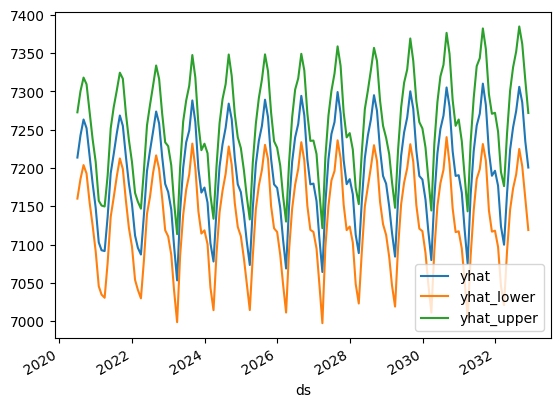

In [ ]:
forecast[['yhat' , 'yhat_lower' , 'yhat_upper']].iloc[-150:,:].plot()

Bring in Temp data

In [ ]:
# Now, bring in the Northern Hemisphere Temperature data from NASA.
# The first row of the csv file is complicated, so delete the first row.
# The temperature is set to a reference temperature - see README.

temps = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    parse_dates=True,
    infer_datetime_format=True
).dropna()

temps.columns = temps.iloc[0]
#temps = temps[1:]

# Review the first and last five rows of the DataFrame
display(temps.head())
display(temps.tail())

,1880,-0.36,-0.51,-0.24,-0.3,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.4,-0.28,***,***,-0.2,-0.2,-0.31
0,1880,-0.36,-0.51,-0.24,-0.30,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.40,-0.28,***,***,-0.20,-0.20,-0.31
1,1881,-0.31,-0.22,-0.04,0.00,0.04,-0.34,0.08,-0.05,-0.28,-0.45,-0.37,-0.23,-0.18,-.20,-.31,0.00,-0.10,-0.36
2,1882,0.26,0.21,0.02,-0.32,-0.24,-0.30,-0.28,-0.14,-0.23,-0.52,-0.32,-0.67,-0.21,-.17,.08,-0.18,-0.24,-0.36
3,1883,-0.57,-0.66,-0.15,-0.29,-0.24,-0.13,-0.04,-0.22,-0.32,-0.16,-0.42,-0.15,-0.28,-.32,-.63,-0.23,-0.13,-0.30
4,1884,-0.16,-0.09,-0.63,-0.60,-0.36,-0.43,-0.40,-0.50,-0.45,-0.44,-0.57,-0.46,-0.42,-.40,-.13,-0.53,-0.44,-0.49


,1880,-0.36,-0.51,-0.24,-0.3,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.4,-0.28,***,***,-0.2,-0.2,-0.31
139,2019,1.19,1.11,1.54,1.24,0.98,1.18,1.03,1.09,1.21,1.30,1.19,1.39,1.20,1.18,1.13,1.25,1.10,1.23
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
141,2021,1.25,0.96,1.20,1.12,1.03,1.20,1.07,1.02,1.05,1.31,1.31,1.15,1.14,1.14,1.14,1.12,1.10,1.22
142,2022,1.24,1.17,1.42,1.08,1.01,1.12,1.05,1.17,1.15,1.31,1.09,1.07,1.16,1.16,1.18,1.17,1.11,1.18
143,2023,1.29,1.32,1.59,1.02,1.11,1.18,1.43,1.57,1.66,1.88,1.99,1.87,1.49,1.43,1.23,1.24,1.39,1.84


In [ ]:
# Rename the columns
# Columns 1-12 are months January through December
column_names = ['Year'] + [f'{i}' for i in range(1, 19)]
temps.columns = column_names
temps

,Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1880,-0.36,-0.51,-0.24,-0.30,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.40,-0.28,***,***,-0.20,-0.20,-0.31
1,1881,-0.31,-0.22,-0.04,0.00,0.04,-0.34,0.08,-0.05,-0.28,-0.45,-0.37,-0.23,-0.18,-.20,-.31,0.00,-0.10,-0.36
2,1882,0.26,0.21,0.02,-0.32,-0.24,-0.30,-0.28,-0.14,-0.23,-0.52,-0.32,-0.67,-0.21,-.17,.08,-0.18,-0.24,-0.36
3,1883,-0.57,-0.66,-0.15,-0.29,-0.24,-0.13,-0.04,-0.22,-0.32,-0.16,-0.42,-0.15,-0.28,-.32,-.63,-0.23,-0.13,-0.30
4,1884,-0.16,-0.09,-0.63,-0.60,-0.36,-0.43,-0.40,-0.50,-0.45,-0.44,-0.57,-0.46,-0.42,-.40,-.13,-0.53,-0.44,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,1.19,1.11,1.54,1.24,0.98,1.18,1.03,1.09,1.21,1.30,1.19,1.39,1.20,1.18,1.13,1.25,1.10,1.23
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
141,2021,1.25,0.96,1.20,1.12,1.03,1.20,1.07,1.02,1.05,1.31,1.31,1.15,1.14,1.14,1.14,1.12,1.10,1.22
142,2022,1.24,1.17,1.42,1.08,1.01,1.12,1.05,1.17,1.15,1.31,1.09,1.07,1.16,1.16,1.18,1.17,1.11,1.18


In [ ]:
# Drop the extraneous data such as the average sesonal temperatures
temps = temps.drop(['13','14','15','16','17','18'], axis=1)
temps

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1880,-0.36,-0.51,-0.24,-0.30,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.40
1,1881,-0.31,-0.22,-0.04,0.00,0.04,-0.34,0.08,-0.05,-0.28,-0.45,-0.37,-0.23
2,1882,0.26,0.21,0.02,-0.32,-0.24,-0.30,-0.28,-0.14,-0.23,-0.52,-0.32,-0.67
3,1883,-0.57,-0.66,-0.15,-0.29,-0.24,-0.13,-0.04,-0.22,-0.32,-0.16,-0.42,-0.15
4,1884,-0.16,-0.09,-0.63,-0.60,-0.36,-0.43,-0.40,-0.50,-0.45,-0.44,-0.57,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,1.19,1.11,1.54,1.24,0.98,1.18,1.03,1.09,1.21,1.30,1.19,1.39
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20
141,2021,1.25,0.96,1.20,1.12,1.03,1.20,1.07,1.02,1.05,1.31,1.31,1.15
142,2022,1.24,1.17,1.42,1.08,1.01,1.12,1.05,1.17,1.15,1.31,1.09,1.07


In [ ]:
# I've already dropped the na rows, but WTH, lets do it again.
temps = temps.dropna()
temps.reset_index(drop=True, inplace=True)
temps.columns

Index(['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [ ]:
# Check the datafile
temps.index

RangeIndex(start=0, stop=144, step=1)

In [ ]:
temps.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1880,-0.36,-0.51,-0.24,-0.30,-0.06,-0.16,-0.18,-0.25,-0.22,-0.31,-0.41,-0.40
1,1881,-0.31,-0.22,-0.04,0.00,0.04,-0.34,0.08,-0.05,-0.28,-0.45,-0.37,-0.23
2,1882,0.26,0.21,0.02,-0.32,-0.24,-0.30,-0.28,-0.14,-0.23,-0.52,-0.32,-0.67
3,1883,-0.57,-0.66,-0.15,-0.29,-0.24,-0.13,-0.04,-0.22,-0.32,-0.16,-0.42,-0.15
4,1884,-0.16,-0.09,-0.63,-0.60,-0.36,-0.43,-0.40,-0.50,-0.45,-0.44,-0.57,-0.46


In [ ]:
# Make the date-time variable from the "Year" and "month-number" columns.
# Grab the temperature variable
len(temps)
tempdic = {}
startyear = 1880

for x in range(0, 144):
  for month in range(1, 13):
    st = f"{startyear + x}-{month}-01"
    tempdic[st] = temps.iloc[x][month]
test_df = pd.DataFrame.from_dict(tempdic, orient='index')
test_df.columns = ["Temperature"]
test_df.index = pd.to_datetime(test_df.index)
test_df

,Temperature
1880-01-01,-0.36
1880-02-01,-0.51
1880-03-01,-0.24
1880-04-01,-0.30
1880-05-01,-0.06
...,...
2023-08-01,1.57
2023-09-01,1.66
2023-10-01,1.88
2023-11-01,1.99


In [ ]:
# Check to see if there are 2 columns for plotting
print(test_df)

# Turns out that, no, there is an index and only one column

            Temperature
1880-01-01        -0.36
1880-02-01        -0.51
1880-03-01        -0.24
1880-04-01        -0.30
1880-05-01        -0.06
...                 ...
2023-08-01         1.57
2023-09-01         1.66
2023-10-01         1.88
2023-11-01         1.99
2023-12-01         1.87

[1728 rows x 1 columns]


In [ ]:
# Take the index and make it a real column.
# This column is the date-time variable.
test_df.reset_index(inplace=True)
print(test_df)

          index  Temperature
0    1880-01-01        -0.36
1    1880-02-01        -0.51
2    1880-03-01        -0.24
3    1880-04-01        -0.30
4    1880-05-01        -0.06
...         ...          ...
1723 2023-08-01         1.57
1724 2023-09-01         1.66
1725 2023-10-01         1.88
1726 2023-11-01         1.99
1727 2023-12-01         1.87

[1728 rows x 2 columns]


In [ ]:
# Send the cleaned data to GoogleDrive
test_df.to_csv('/content/drive/MyDrive/my_cleaned_northern_hemisphere_temp.csv', index=False)

In [ ]:
# Create a datetime (= x-axis) and y-axis variables
test_df.columns = ['ds' , 'y']
display(test_df)

,ds,y
0,1880-01-01,-0.36
1,1880-02-01,-0.51
2,1880-03-01,-0.24
3,1880-04-01,-0.30
4,1880-05-01,-0.06
...,...,...
1723,2023-08-01,1.57
1724,2023-09-01,1.66
1725,2023-10-01,1.88
1726,2023-11-01,1.99


In [ ]:
from re import M
m = Prophet()

In [ ]:
m.fit(test_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm70e66j/94_il3ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm70e66j/jhn5mq9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31975', 'data', 'file=/tmp/tmpjm70e66j/94_il3ja.json', 'init=/tmp/tmpjm70e66j/jhn5mq9j.json', 'output', 'file=/tmp/tmpjm70e66j/prophet_modelcdj668lz/prophet_model-20240207222115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Set the future dates to be estimated to be 10 years by month
future = m.make_future_dataframe(periods=120, freq='M')
display(future.tail(10))


,ds
1838,2033-02-28
1839,2033-03-31
1840,2033-04-30
1841,2033-05-31
1842,2033-06-30
1843,2033-07-31
1844,2033-08-31
1845,2033-09-30
1846,2033-10-31
1847,2033-11-30


In [ ]:
# Forecast the data for the next 10 years
forecast = m.predict(future)
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1843,2033-07-31,1.565974,1.307940,1.857456,1.543113,1.590770,0.008298,0.008298,0.008298,0.008298,0.008298,0.008298,0.0,0.0,0.0,1.574273
1844,2033-08-31,1.568478,1.253265,1.833383,1.545249,1.593715,-0.017007,-0.017007,-0.017007,-0.017007,-0.017007,-0.017007,0.0,0.0,0.0,1.551471
1845,2033-09-30,1.570902,1.362116,1.905392,1.547212,1.596337,0.058671,0.058671,0.058671,0.058671,0.058671,0.058671,0.0,0.0,0.0,1.629573
1846,2033-10-31,1.573406,1.303683,1.865144,1.549256,1.599399,0.019546,0.019546,0.019546,0.019546,0.019546,0.019546,0.0,0.0,0.0,1.592952
1847,2033-11-30,1.575829,1.220023,1.757814,1.551220,1.601993,-0.084386,-0.084386,-0.084386,-0.084386,-0.084386,-0.084386,0.0,0.0,0.0,1.491443


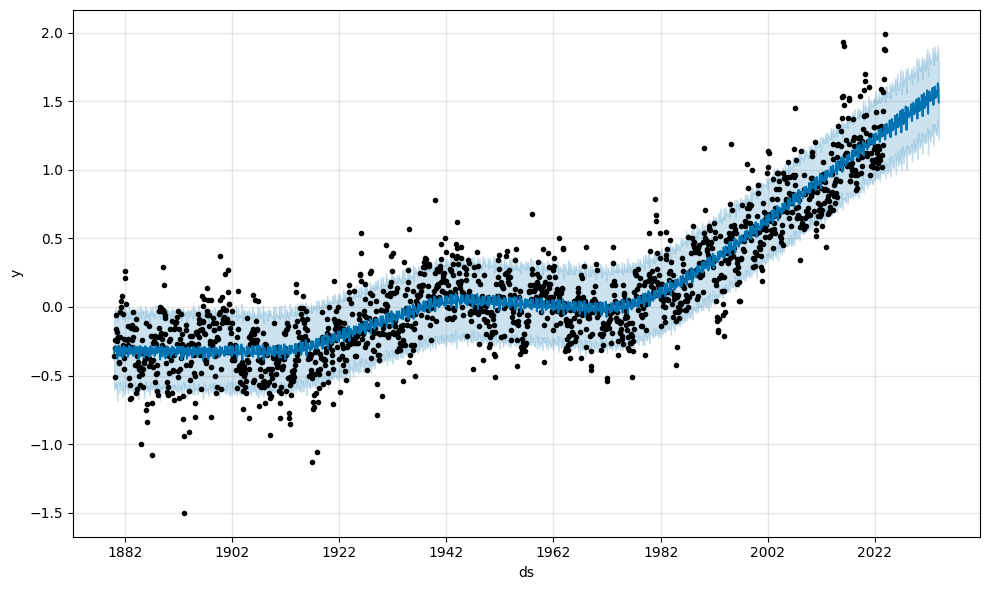

In [ ]:
m.plot(forecast);

In [ ]:
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1843,2033-07-31,1.574273,1.307940,1.857456
1844,2033-08-31,1.551471,1.253265,1.833383
1845,2033-09-30,1.629573,1.362116,1.905392
1846,2033-10-31,1.592952,1.303683,1.865144
1847,2033-11-30,1.491443,1.220023,1.757814


In [ ]:
forecast = forecast.set_index('ds')
forecast.tail(10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2033-02-28,1.553615,1.331808,1.898797,1.532418,1.576090,0.052498,0.052498,0.052498,0.052498,0.052498,0.052498,0.0,0.0,0.0,1.606113
2033-03-31,1.556119,1.296028,1.841411,1.534548,1.579192,0.002931,0.002931,0.002931,0.002931,0.002931,0.002931,0.0,0.0,0.0,1.559050
2033-04-30,1.558543,1.267183,1.799348,1.536598,1.581928,-0.035066,-0.035066,-0.035066,-0.035066,-0.035066,-0.035066,0.0,0.0,0.0,1.523477
2033-05-31,1.561047,1.270974,1.816194,1.538790,1.584710,-0.015372,-0.015372,-0.015372,-0.015372,-0.015372,-0.015372,0.0,0.0,0.0,1.545674
2033-06-30,1.563470,1.250407,1.810624,1.540911,1.587378,-0.025995,-0.025995,-0.025995,-0.025995,-0.025995,-0.025995,0.0,0.0,0.0,1.537475
2033-07-31,1.565974,1.307940,1.857456,1.543113,1.590770,0.008298,0.008298,0.008298,0.008298,0.008298,0.008298,0.0,0.0,0.0,1.574273
2033-08-31,1.568478,1.253265,1.833383,1.545249,1.593715,-0.017007,-0.017007,-0.017007,-0.017007,-0.017007,-0.017007,0.0,0.0,0.0,1.551471
2033-09-30,1.570902,1.362116,1.905392,1.547212,1.596337,0.058671,0.058671,0.058671,0.058671,0.058671,0.058671,0.0,0.0,0.0,1.629573
2033-10-31,1.573406,1.303683,1.865144,1.549256,1.599399,0.019546,0.019546,0.019546,0.019546,0.019546,0.019546,0.0,0.0,0.0,1.592952


<Axes: xlabel='ds'>

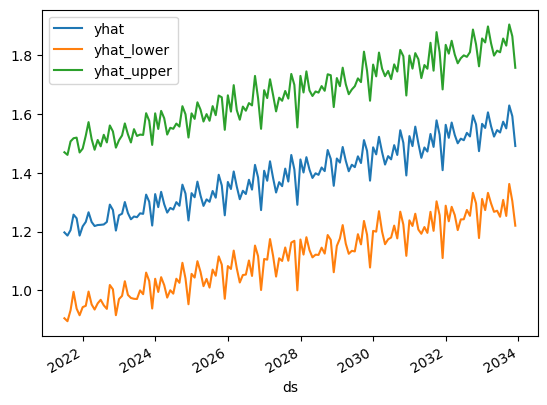

In [ ]:
forecast[['yhat' , 'yhat_lower' , 'yhat_upper']].iloc[-150:,:].plot()

Compare sea level rise and temp

In [ ]:
# Try to get a correlation for temperature (test_df) and sea level (new_df)
# Merge DataFrames based on datetime_column with an inner join
combined_df = pd.merge(new_df, test_df, on='ds', how='inner')

# Print the combined DataFrame
print(combined_df)

             ds   y_x   y_y
0    1930-01-01  6774 -0.12
1    1930-02-01  6777 -0.19
2    1930-03-01  6702  0.12
3    1930-04-01  6750 -0.15
4    1930-05-01  6726 -0.20
...         ...   ...   ...
1086 2022-08-01  7257  1.17
1087 2022-09-01  7229  1.15
1088 2022-10-01  7224  1.31
1089 2022-11-01  7232  1.09
1090 2022-12-01  7138  1.07

[1091 rows x 3 columns]


In [ ]:
# Rename the columns
combined_df = combined_df.rename(columns={ 'ds':'year_month_day', 'y_x':'sea_level_mm' , 'y_y':'temp_C' })
print(combined_df)

     year_month_day  sea_level_mm  temp_C
0        1930-01-01          6774   -0.12
1        1930-02-01          6777   -0.19
2        1930-03-01          6702    0.12
3        1930-04-01          6750   -0.15
4        1930-05-01          6726   -0.20
...             ...           ...     ...
1086     2022-08-01          7257    1.17
1087     2022-09-01          7229    1.15
1088     2022-10-01          7224    1.31
1089     2022-11-01          7232    1.09
1090     2022-12-01          7138    1.07

[1091 rows x 3 columns]


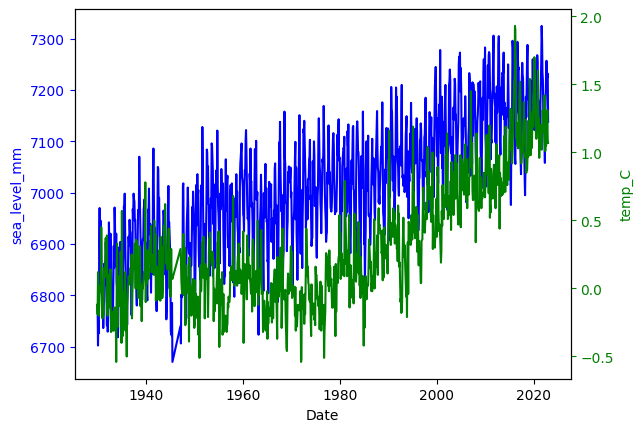

In [ ]:
# Make a combined plot so that we can visually compare the sea level rise to temperature change
import matplotlib.pyplot as plt

# Plot the variables on two graphs with shared x-axis
fig, ax1 = plt.subplots()

# Plotting the first variable on the first graph
ax1.plot(combined_df['year_month_day'], combined_df['sea_level_mm'], color='blue', label='sea_level_mm')
ax1.set_xlabel('Date')
ax1.set_ylabel('sea_level_mm', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the second variable
ax2 = ax1.twinx()
ax2.plot(combined_df['year_month_day'], combined_df['temp_C'], color='green', label='temp_C')
ax2.set_ylabel('temp_C', color='green')
ax2.tick_params('y', colors='green')

# Display the plot
plt.show()

In [ ]:
# Determine the coooelation coefficient
from scipy import stats as st
var_sea_level = combined_df['sea_level_mm']
var_temp = combined_df['temp_C']
correlation = st.pearsonr(var_sea_level, var_temp)
r = round(correlation[0],2)
print(f'Correlation r = {r}')


Correlation r = 0.59


In [ ]:
# Calculate the correlation coefficient and print the results.
correlation_coefficient = combined_df['sea_level_mm'].corr(combined_df['temp_C'])

# Print the result
print(f"Correlation Coefficient between Sea Level (in mm) and Northern Hemisphere Temperature change (C): {correlation_coefficient}")


Correlation Coefficient between Sea Level (in mm) and Northern Hemisphere Temperature change (C): 0.5883495352802653


In [ ]:
City2

In [ ]:
# This section of code will compare the Wilmington (city1) sea level rise to Miami (city2) sea level rise.
# load the csv file that contains the mean sea level data.
uploaded=files.upload()

Saving city_2.csv to city_2.csv


In [ ]:
# This section of code will clean the data for the second city - Miami.
# Since we know how to clean the data, we will not print out intermediary stuff
df = pd.read_csv("city_2.csv", sep=';', names=['date', 'height', 'ig1', 'ig2'])
df = df[['date', 'height']]
df['height'] = df['height'].astype(int)
df = df[df['height'] >= 5000]
df = df.reset_index(drop=True)
df['date'] = df['date'].str.replace('\xa0 ', '')
df['date'] = df['date'].str.strip()  # Remove leading and trailing whitespaces
df['date'] = df['date'].astype(float)  # Convert 'date' column to float
df['year'] = df['date'].astype(int)  # Extract 'year' and 'month' columns
df['month'] = (df['date'] - df['year']) * 12
df['month'] = df['month'] + 0.5
df['int_month'] = round(df['month']).astype(int)
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['int_month'].astype(str), format='%Y-%m')
city_2_df = df[['year_month', 'height']].copy()
city_2_df.columns = ['ds' , 'y']


In [ ]:
# Merge city_1_df to city_2_df on datetime
cities_df = pd.merge(new_df, city_2_df, on='ds', how='inner')
print(cities_df)

            ds   y_x   y_y
0   1998-01-01  7021  6940
1   1998-02-01  7015  6870
2   1998-03-01  7020  6930
3   1998-04-01  6962  6830
4   1998-05-01  6977  6910
..         ...   ...   ...
285 2022-08-01  7257  6930
286 2022-09-01  7229  7090
287 2022-10-01  7224  7220
288 2022-11-01  7232  7070
289 2022-12-01  7138  7070

[290 rows x 3 columns]


In [ ]:
# Rename the columns
cities_df = cities_df.rename(columns={ 'ds':'year_month_day', 'y_x':'City1' , 'y_y':'City2' })
print(cities_df)

    year_month_day  City1  City2
0       1998-01-01   7021   6940
1       1998-02-01   7015   6870
2       1998-03-01   7020   6930
3       1998-04-01   6962   6830
4       1998-05-01   6977   6910
..             ...    ...    ...
285     2022-08-01   7257   6930
286     2022-09-01   7229   7090
287     2022-10-01   7224   7220
288     2022-11-01   7232   7070
289     2022-12-01   7138   7070

[290 rows x 3 columns]


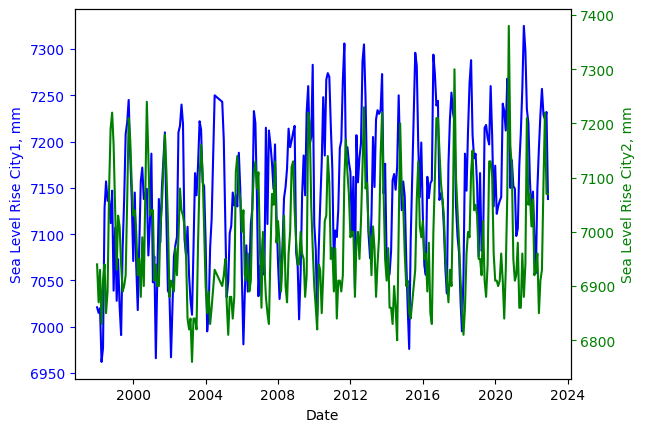

In [ ]:
# Make a combined plot so that we can visually compare the sea level rise to temperature change
import matplotlib.pyplot as plt

# Plot the variables on two graphs with shared x-axis
fig, ax1 = plt.subplots()

# Plotting the first variable on the first graph
ax1.plot(cities_df['year_month_day'], cities_df['City1'], color='blue', label='City1')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sea Level Rise City1, mm', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the second variable
ax2 = ax1.twinx()
ax2.plot(cities_df['year_month_day'], cities_df['City2'], color='green', label='City2')
ax2.set_ylabel('Sea Level Rise City2, mm', color='green')
ax2.tick_params('y', colors='green')

# Display the plot
plt.show()

In [ ]:
# Determine the coooelation coefficient
from scipy import stats as st
sea_level_rise_city1 = cities_df['City1']
sea_level_rise_city2 = cities_df['City2']
correlation = st.pearsonr(sea_level_rise_city1, sea_level_rise_city2)
r = round(correlation[0],2)
print(f'Correlation r = {r}')

Correlation r = 0.39
